# **Análisis Exploratorio de Datos** (EDA)

Para dar inicio a nuestro análisis exploratorio de datos (EDA), es fundamental comenzar por la base sólida de la limpieza y validación preliminar de los datos. Esta etapa es esencial para garantizar la integridad y confiabilidad de nuestra información antes de sumergirnos en la formulación de preguntas, la obtención de conclusiones y la toma de decisiones basadas en datos.

En esta fase inicial, nuestro objetivo principal es identificar y abordar cualquier valor faltante, incorrecto o atípico que pueda comprometer la calidad de los datos. La calidad de los datos es un factor crítico en cualquier análisis, ya que los resultados y las conclusiones dependerán en gran medida de la calidad de los datos subyacentes.

Una vez que hayamos completado la limpieza y validación preliminar de los datos, estaremos en una posición sólida para explorar los patrones, relaciones y tendencias presentes en los datos, lo que nos permitirá obtener una comprensión más profunda y significativa de nuestro conjunto de datos. A través del EDA, podremos formular preguntas relevantes, realizar análisis estadísticos y visuales, y llegar a conclusiones que respalden la toma de decisiones informadas.

### En una primera instancia, comenzaremos importando las herramientas necesarias para llevar a cabo la limpieza de datos y cargar los conjuntos de datos que servirán como nuestras fuentes de información.
 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from funcion import *
import warnings
warnings.filterwarnings("ignore")

In [177]:
df1 = pd.read_excel(r"datasets/mapa_conectividad.xlsx")
df2 = pd.read_excel(r"datasets/Internet_BAF.xlsx",sheet_name="Total")
df3 = pd.read_excel(r"datasets/Internet_BAF.xlsx",sheet_name="Provincial")
df4 = pd.read_excel(r"datasets/Internet_Accesos-por-velocidad.xlsx",sheet_name="Total")
df5 = pd.read_excel(r"datasets/Internet_Accesos-por-velocidad.xlsx",sheet_name="Provincia") 
df6 = pd.read_excel(r"datasets/Internet_Accesos-por-velocidad.xlsx",sheet_name="Provincia Sin rangos")
df7 = pd.read_excel(r"datasets/historico_velocidad_internet.xlsx",sheet_name="Total")
df8 = pd.read_excel(r"datasets/historico_velocidad_internet.xlsx",sheet_name="Provincial")
df9 = pd.read_excel(r"datasets/Internet_Accesos-por-tecnologia.xlsx",sheet_name="Total")
df10 = pd.read_excel(r"datasets/Internet_Accesos-por-tecnologia.xlsx",sheet_name="Provincial")
df11 =pd.read_excel(r"datasets/Internet_Penetracion.xlsx",sheet_name="Total")
df12 =pd.read_excel(r"datasets/Internet_Penetracion.xlsx",sheet_name="Provincia")
df13 = pd.read_excel(r"datasets/Internet_Ingresos.xlsx")
df14 = pd.read_excel(r"datasets/Internet_Accesos-por-velocidad_por loc.xlsx")
df15 = pd.read_excel(r"datasets/Internet-Accesos-por-tecno_por_loc.xlsx")

# Listado de localidades con conectividad a internet.
Listado de localidades con conectividad a internet, con detalle por tipo de conexión.

In [16]:
df1.head(2)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136


In [17]:
df1.describe()

,Población,Link,Latitud,Longitud
count,4.311000e+03,4.299000e+03,4311.000000,4311.000000
mean,8.695088e+03,3.909339e+07,-32.261794,-63.039123
std,3.821965e+04,2.939438e+07,4.999418,3.830260
min,0.000000e+00,2.000010e+06,-77.874009,-72.891627
25%,1.160000e+02,1.009104e+07,-34.707626,-65.687041
50%,5.760000e+02,3.400705e+07,-32.283511,-63.450636
75%,3.203000e+03,6.612602e+07,-28.584663,-60.008572
max,1.317298e+06,9.401402e+07,-21.817293,-34.626560


In [19]:
df1.drop_duplicates(inplace= True)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


In [26]:
sin_errores = df1.replace({"SI":True,"--":False})

In [27]:
sin_errores

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,True,False,False,False,False,False,True,True,True,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,False,False,False,False,False,False,True,True,True,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,False,False,True,False,False,True,True,True,True,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,False,False,False,False,False,False,False,False,True,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,True,False,False,True,False,False,True,True,True,6588060.0,-35.520141,-60.998949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,86158,True,True,True,True,True,True,True,True,True,6638040.0,-34.466332,-58.922720
4307,BUENOS AIRES,Pilar,Presidente Derqui,50783,True,True,False,True,False,True,True,True,True,6638040.0,-34.492862,-58.841699
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,0,False,False,False,False,False,False,False,True,True,6638040.0,-34.436965,-58.766994
4309,BUENOS AIRES,Pilar,Santa Teresa,5324,False,False,False,False,True,False,False,True,True,6638040.0,-34.436691,-58.757347


In [28]:
tecnologías = sin_errores[["ADSL","Cablemódem","Dial Up","Fibra óptica","4G","3G","Telefonía Fija","Wireless","Satelital"]]

In [29]:
cant_tec = tecnologías.sum().reset_index()

In [31]:
cant_tec= cant_tec.rename(columns={"index":"Tipo", 0:"cantidad"})

In [33]:
cant_tec = cant_tec.sort_values("cantidad", ascending=False)

In [34]:
cant_tec

,Tipo,cantidad
4,4G,2574
6,Telefonía Fija,2243
7,Wireless,2224
5,3G,1880
3,Fibra óptica,1527
0,ADSL,1129
8,Satelital,1063
1,Cablemódem,863
2,Dial Up,403


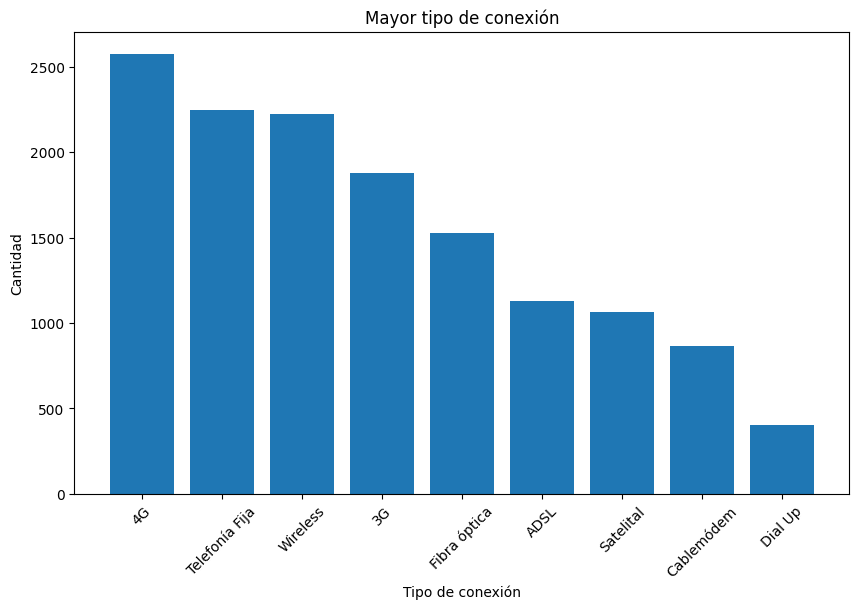

In [35]:

plt.figure(figsize=(10, 6))
plt.bar(cant_tec["Tipo"], cant_tec["cantidad"])
plt.xlabel("Tipo de conexión")
plt.ylabel("Cantidad")
plt.title("Mayor tipo de conexión")
plt.xticks(rotation=45)  

plt.show()

Tras realizar nuestra limpieza y observación de los datos, es evidente que existe una marcada disparidad en el acceso a Internet a través de dispositivos móviles, específicamente en lo que respecta a la tecnología 4G

# Total nacional de accesos a Internet fijo por banda ancha y banda angosta
Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral)

In [38]:
df2.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11195668,12446,11208114,Oct-Dic 2022
1,2022,3,11078691,12437,11091128,Jul-Sept 2022
2,2022,2,10946248,12436,10958684,Abr-Jun 2022
3,2022,1,10611390,12619,10624009,Ene-Mar 2022
4,2021,4,10476933,12861,10489794,Oct-Dic 2021


In [39]:
outliers_col(df2)

Año | 0 | int64
Trimestre | 0 | int64
Banda ancha fija | 0 | int64
Dial up | 0 | int64
Total | 0 | int64


In [42]:
df2.drop_duplicates(inplace=True)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [44]:
df2.isna().sum()

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

In [45]:
banda_año = df2.groupby("Año").sum()["Banda ancha fija"].reset_index()

In [46]:
banda_año

,Año,Banda ancha fija
0,2014,25908873
1,2015,27337549
2,2016,28373776
3,2017,30217820
4,2018,32865578
5,2019,35490694
6,2020,36731204
7,2021,40042775
8,2022,43831997


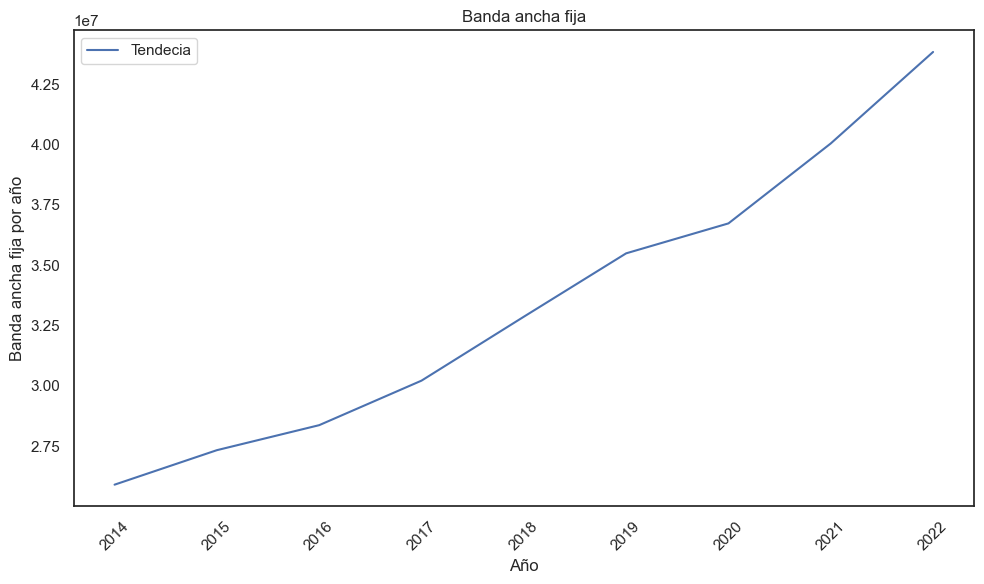

In [47]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.lineplot(data= banda_año, x="Año", y="Banda ancha fija", label="Tendecia")



plt.title("Banda ancha fija")
plt.xlabel("Año")
plt.ylabel("Banda ancha fija por año")
plt.xticks(rotation=45)
plt.tight_layout()

 
Lo que se puede observar es un constante crecimiento en el acceso a Internet fijo a través de banda ancha a lo largo de los años, a nivel nacional
Este desarrollo podría ser un indicador de una mayor infraestructura de telecomunicaciones y una mayor conciencia sobre la importancia de la conectividad de banda ancha, lo que, en última instancia, podría contribuir al progreso y desarrollo tecnológico en el país.

# Accesos a banda ancha y banda angosta por provincia
Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral)

In [49]:
df3.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


In [50]:
outliers_col(df3)

Año | 0 | int64
Trimestre | 0 | int64
Banda ancha fija | 36 | int64
Dial up | 0 | float64
Total | 36 | int64


In [51]:
df3.drop_duplicates(inplace=True)

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [53]:
filtro = df3.groupby("Provincia").sum()["Banda ancha fija"].reset_index()

In [54]:
ord_filtro = filtro.sort_values("Banda ancha fija", ascending=False)

In [55]:
ord_filtro.head()

,Provincia,Banda ancha fija
0,Buenos Aires,127802822
1,Capital Federal,50416407
6,Córdoba,27311083
20,Santa Fe,24831612
7,Entre Ríos,7520333


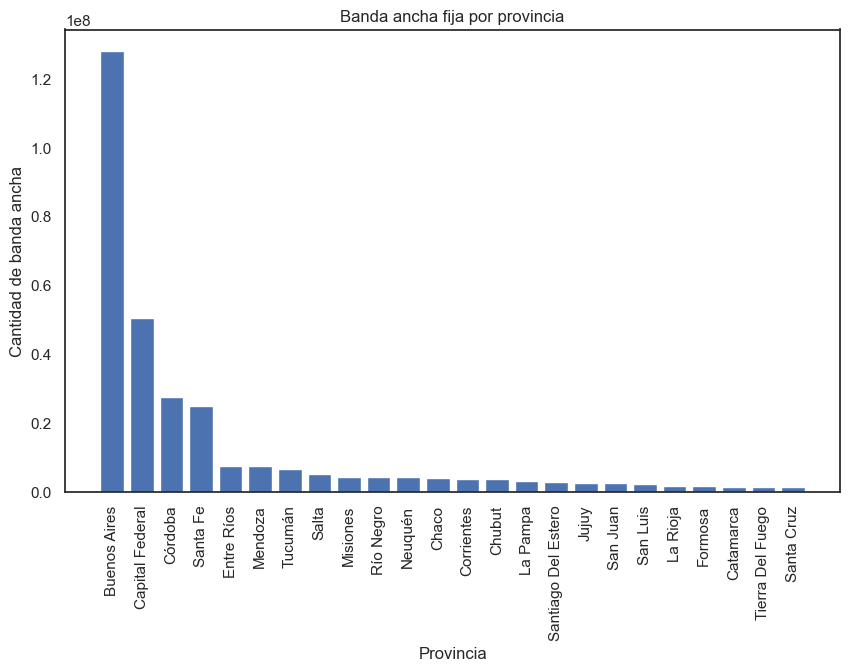

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(ord_filtro["Provincia"], ord_filtro["Banda ancha fija"])
plt.xlabel("Provincia")
plt.ylabel("Cantidad de banda ancha")
plt.title("Banda ancha fija por provincia")
plt.xticks(rotation=90)

plt.show()

Es innegable que existe una disparidad significativa en el acceso a banda ancha entre las principales provincias, como Buenos Aires, CABA o Córdoba, y las provincias más al sur, como Tierra del Fuego o Santa Cruz. Esta disparidad posiblemente se deba a las diferencias en la densidad de población. Las provincias con mayor cantidad de habitantes pueden tener una infraestructura de telecomunicaciones más desarrollada y una mayor competencia en el mercado, lo que facilita un acceso más amplio a la banda ancha.

# Acceso a Internet Fijo por rangos de velocidad de bajada
Número de accesos al servicio de Internet fijo por velocidad de bajada nacional (trimestral)

In [66]:
df4.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


In [68]:
outliers_col(df4)

Año | 0 | int64
Trimestre | 0 | int64
Hasta 512 kbps | 1 | int64
Entre 512 Kbps y 1 Mbps | 0 | int64
Entre 1 Mbps y 6 Mbps | 0 | int64
Entre 6 Mbps y 10 Mbps | 0 | int64
Entre 10 Mbps y 20 Mbps | 0 | int64
Entre 20 Mbps y 30 Mbps | 0 | int64
Más de 30 Mbps | 0 | int64
OTROS | 0 | int64
Total | 0 | int64


In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      36 non-null     int64
 1   Trimestre                36 non-null     int64
 2   Hasta 512 kbps           36 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   36 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  36 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  36 non-null     int64
 8   Más de 30 Mbps           36 non-null     int64
 9   OTROS                    36 non-null     int64
 10  Total                    36 non-null     int64
dtypes: int64(11)
memory usage: 3.2 KB


# Acceso a Internet Fijo por rangos de velocidad de bajada y provincia
Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia (trimestral)

In [70]:
df5.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


In [72]:
df5.drop_duplicates(inplace=True)

In [73]:
outliers_col(df5)

Año | 0 | int64
Trimestre | 0 | int64
HASTA 512 kbps | 4 | float64
+ 512 Kbps - 1 Mbps | 30 | float64
+ 1 Mbps - 6 Mbps | 23 | float64
+ 6 Mbps - 10 Mbps | 29 | float64
+ 10 Mbps - 20 Mbps | 21 | float64
+ 20 Mbps - 30 Mbps | 15 | float64
+ 30 Mbps | 18 | float64
OTROS | 0 | float64
Total | 36 | float64


In [74]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.1+ KB


# Accesos a Internet fijo por velocidad bajada y provincia
Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia

In [78]:
df6.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
df6.drop_duplicates(inplace=True)

In [80]:
outliers_col(df6)

Año | 0 | float64
Trimestre | 0 | float64
Otros | 0 | float64
0,256 Mbps | 0 | float64
0,375 Mbps | 0 | float64
0,625 Mbps | 0 | float64
0,5 Mbps | 0 | float64
0,512 Mbps | 0 | float64
0,75 Mbps | 0 | float64
1 Mbps | 0 | float64
1,2 Mbps | 0 | float64
1,25 Mbps | 0 | float64
1,5 Mbps | 0 | float64
2 Mbps | 0 | float64
2,2 Mbps | 0 | float64
2,5 Mbps | 8 | int64
6,7 Mbps | 0 | float64
3 Mbps | 0 | float64
3,2 Mbps | 0 | float64
3,3 Mbps | 0 | float64
3,5 Mbps | 0 | float64
4 Mbps | 0 | float64
4,5 Mbps | 0 | float64
5 Mbps | 0 | float64
6 Mbps | 0 | float64
6,4 Mbps | 0 | float64
7 Mbps | 0 | float64
7,5 Mbps | 0 | float64
8 Mbps | 0 | float64
9 Mbps | 0 | float64
10 Mbps | 0 | float64
10,2 Mbps | 0 | float64
10,6 Mbps | 0 | float64
11 Mbps | 0 | float64
12 Mbps | 0 | float64
12,3 Mbps | 0 | float64
13 Mbps | 0 | float64
14 Mbps | 0 | float64
15 Mbps | 0 | float64
16 Mbps | 0 | float64
17 Mbps | 0 | float64
18 Mbps | 0 | float64
19 Mbps | 0 | float64
20 Mbps | 0 | float64
20,5 Mbps | 0

In [81]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Columns: 186 entries, Año to 10000 Mbps
dtypes: float64(184), int64(1), object(1)
memory usage: 734.0+ KB


**Decidimos abstenernos de sacar conclusiones sobre los datos de los rangos de velocidad de bajada, ya que contamos con información de promedios de descarga en otros conjuntos de datos. Esto nos permitirá realizar un análisis más preciso y completo de la calidad de la conexión a Internet, evitando duplicación de esfuerzos y enfocando nuestra atención en aspectos más relevantes de nuestro estudio.**

# Velocidad media de bajada de Internet
Serie histórica de la velocidad media de descarga de Internet nacional (trimestral)

In [88]:
df7.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,106.56,Oct-Dic 2022
1,2022,3,62.46,Jul-Sept 2022
2,2022,2,58.44,Abr-Jun 2022
3,2022,1,55.11,Ene-Mar 2022
4,2021,4,52.34,Oct-Dic 2021


In [90]:
outliers_col(df7)

Año | 0 | int64
Trimestre | 0 | int64
Mbps (Media de bajada) | 1 | float64


In [92]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [98]:
vel_baj_año = df7.groupby("Año").sum()["Mbps (Media de bajada)"].reset_index()

In [99]:
vel_baj_año

,Año,Mbps (Media de bajada)
0,2014,15.399992
1,2015,18.675020
2,2016,22.783393
3,2017,34.130709
4,2018,58.380880
5,2019,90.150000
6,2020,158.870000
7,2021,189.540000
8,2022,282.570000


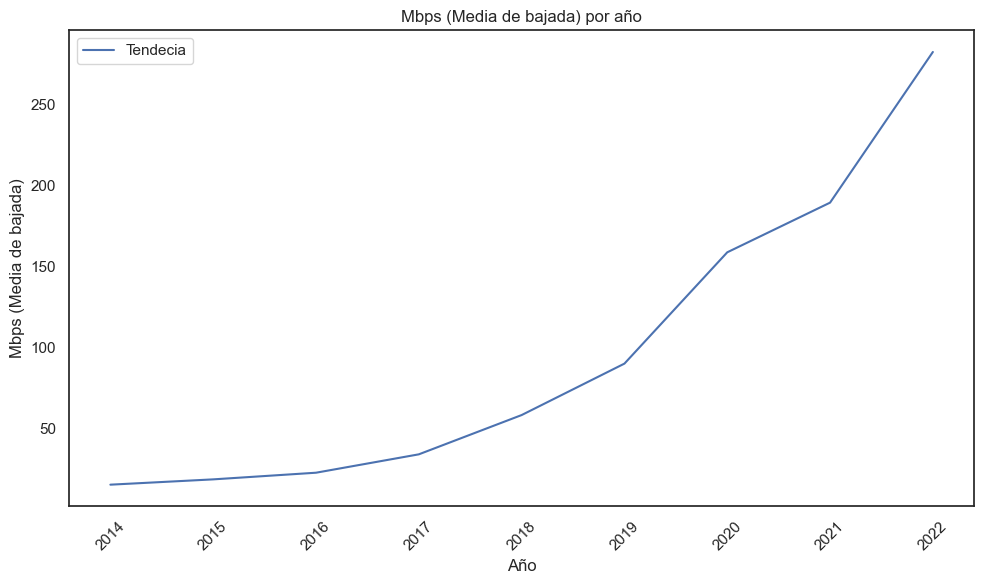

In [104]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.lineplot(data= vel_baj_año, x="Año", y="Mbps (Media de bajada)", label="Tendecia")



plt.title("Mbps (Media de bajada) por año")
plt.xlabel("Año")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=45)
plt.tight_layout()

Observamos un sólido crecimiento anual en la velocidad media de bajada a nivel nacional

# Velocidad media de bajada de Internet fijo por provincia
Serie histórica de la velocidad media de descarga de Internet por provincia (trimestral)

In [89]:
df8.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [91]:
outliers_col(df8)

Año | 0 | int64
Trimestre | 0 | int64
Mbps (Media de bajada) | 20 | float64


In [93]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [94]:
Mbps_provi = df8.groupby("Provincia")["Mbps (Media de bajada)"].sum().reset_index()

In [95]:
mayor_vel = Mbps_provi.sort_values("Mbps (Media de bajada)",ascending=False)

In [96]:
mayor_vel.head()

,Provincia,Mbps (Media de bajada)
1,Capital Federal,1347.752151
0,Buenos Aires,971.675297
6,Córdoba,794.049377
23,Tucumán,760.324082
3,Chaco,744.237414


<function matplotlib.pyplot.show(close=None, block=None)>

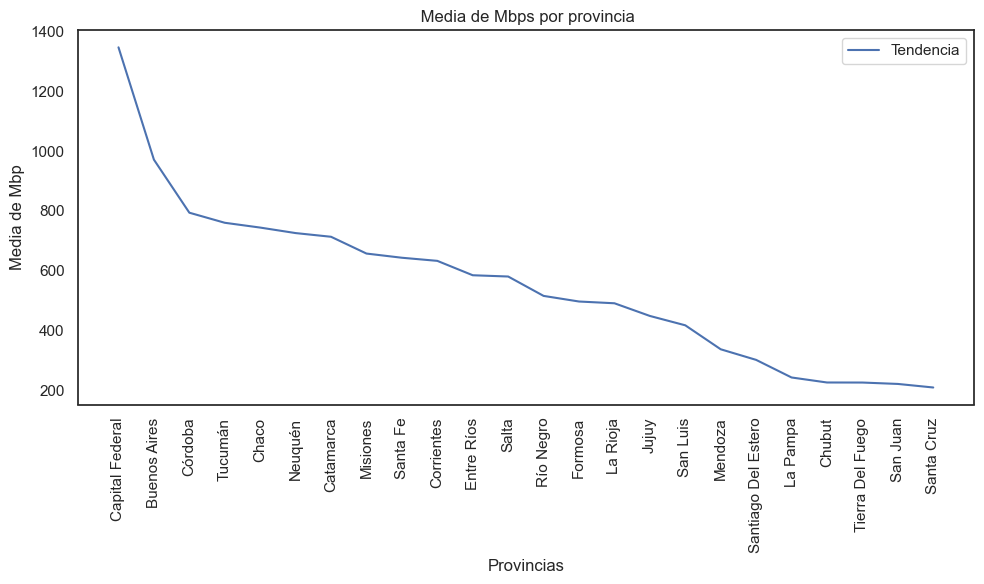

In [103]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.lineplot(data= mayor_vel, x="Provincia", y="Mbps (Media de bajada)", label="Tendencia")


plt.title(" Media de Mbps por provincia")
plt.xlabel("Provincias")
plt.ylabel("Media de Mbp")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show


Nuevamente, observamos una diferenciación marcada entre las provincias principales y las del sur en cuanto a la velocidad de bajada. Este contraste en la calidad de la conexión refleja las disparidades en la infraestructura de telecomunicaciones entre las áreas urbanas más densamente pobladas y las regiones más remotas del sur.

# Serie trimestral de accesos a Internet fijo por tecnología
Número de accesos al servicio de Internet fijo por tipo de tecnología. Total nacional (trimestral)

In [112]:
df9.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


In [113]:
df9.drop_duplicates(inplace= True)

In [114]:
outliers_col(df9)

Año | 0 | int64
Trimestre | 0 | int64
ADSL | 0 | int64
Cablemodem | 0 | int64
Fibra óptica | 0 | int64
Wireless | 0 | int64
Otros | 0 | int64
Total | 0 | int64


In [115]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


In [116]:
tec_año = df9.groupby("Año")[["ADSL", "Cablemodem", "Fibra óptica","Wireless","Otros","Total"]].sum().reset_index()

In [117]:
tec_año

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2014,14884750,9975087,604862,305234,286700
1,2015,15115694,11162971,620877,331431,242846
2,2016,15073814,12177088,680127,337396,227633
3,2017,14639302,14148063,766312,432844,344162
4,2018,13981984,16571272,1079124,870047,465760
5,2019,11447626,18754974,3191409,1262831,909341
6,2020,9072828,20539964,4636620,1563813,958018
7,2021,7802044,22877010,6473506,1927038,1006793
8,2022,5712223,24122067,10874934,2232136,940575


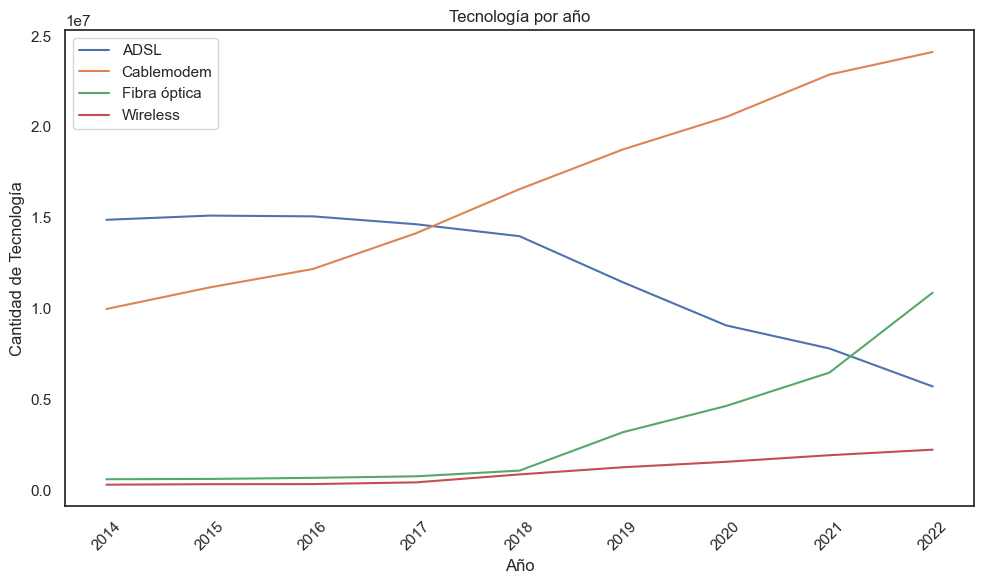

In [118]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.lineplot(data= tec_año, x="Año", y="ADSL", label="ADSL")
sns.lineplot(data= tec_año, x="Año", y="Cablemodem", label="Cablemodem")
sns.lineplot(data= tec_año, x="Año", y="Fibra óptica", label="Fibra óptica")
sns.lineplot(data= tec_año, x="Año", y="Wireless", label="Wireless")


plt.title("Tecnología por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Tecnología")
plt.xticks(rotation=45)
plt.tight_layout()

Es evidente a simple vista cómo las nuevas tecnologías, como la "Fibra óptica", muestran un notable potencial de crecimiento en comparación con las tecnologías existentes. Este ascenso en la adopción de la fibra óptica puede atribuirse a su capacidad superior de transmisión de datos y mayor velocidad, lo que la convierte en una opción atractiva para los usuarios que buscan una conectividad de alta calidad.

# Acceso a Internet fijo por tecnología y provincia
Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral)

In [124]:
df10.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0


In [125]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 61.0+ KB


In [126]:
outliers_col(df10)

ADSL | 0 | float64
Cablemodem | 0 | float64
Fibra óptica | 0 | float64
Wireless | 0 | float64
Otros | 0 | float64
Total | 0 | float64


In [127]:
Cant_tec_provincia = df10.groupby("Provincia")["Total"].sum().reset_index()

In [128]:
mayor_tec = Cant_tec_provincia.sort_values("Total",ascending=False)

In [129]:
mayor_tec.head()

,Provincia,Total
0,Buenos Aires,128149212.0
1,Capital Federal,50623531.0
6,Córdoba,27315747.0
20,Santa Fe,24843951.0
7,Entre Ríos,7522924.0


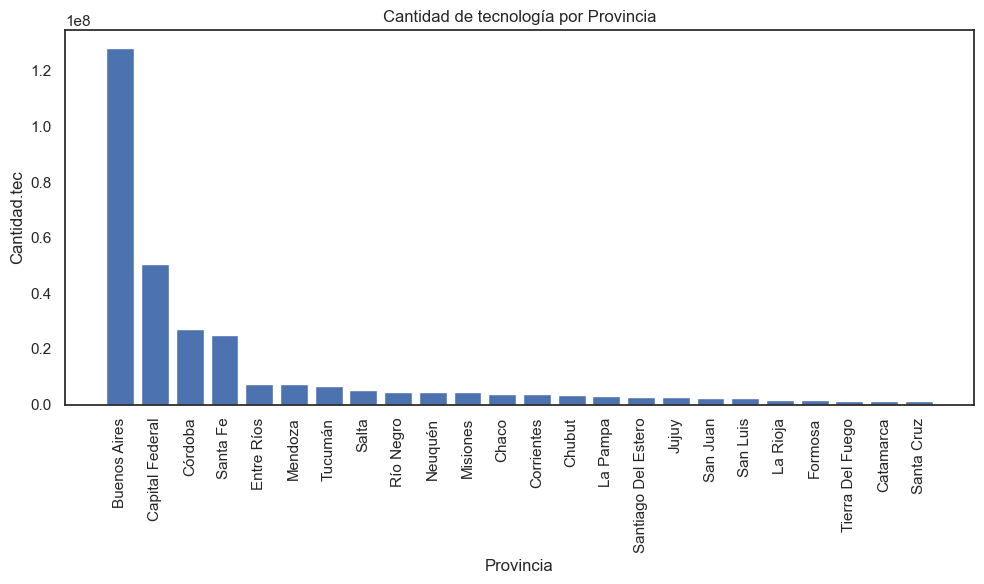

In [130]:
plt.figure(figsize=(10, 6))
plt.bar(mayor_tec["Provincia"], mayor_tec["Total"])
plt.xlabel("Provincia")
plt.ylabel("Cantidad.tec")
plt.title("Cantidad de tecnología por Provincia")

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Penetración por hogares nacional de Internet fijo
Serie trimestral de la penetración del Internet fijo en la métrica por cada 100 hogares

In [136]:
df11.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.210000,24.150000,Oct-Dic 2022
1,2022,3,76.640000,23.950000,Jul-Sept 2022
2,2022,2,75.965424,23.720442,Abr-Jun 2022
3,2022,1,73.878803,23.049171,Ene-Mar 2022
4,2021,4,73.176397,22.810702,Oct-Dic 2021


In [137]:
df11.drop_duplicates(inplace=True)

In [138]:
outliers_col(df11)

Año | 0 | int64
Trimestre | 0 | int64
Accesos por cada 100 hogares | 0 | float64
Accesos por cada 100 hab | 0 | float64


In [139]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


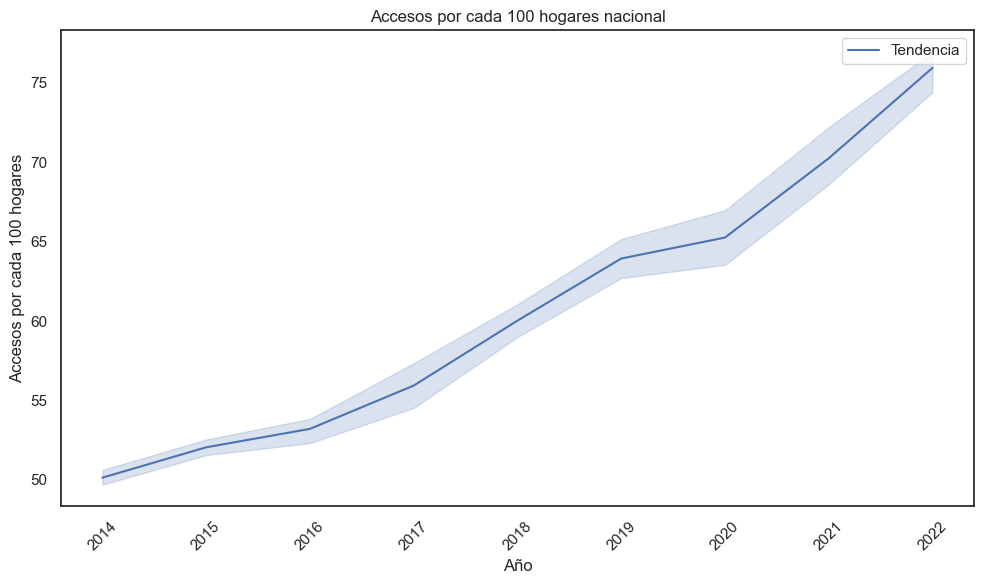

In [140]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.lineplot(data= df11, x="Año", y="Accesos por cada 100 hogares", label="Tendencia")


plt.title("Accesos por cada 100 hogares nacional")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.xticks(rotation=45)
plt.tight_layout()

Lo que destaca positivamente es el notorio crecimiento en el acceso a Internet en cada 100 hogares a lo largo de los años. Este aumento constante refleja un progreso significativo en la conectividad digital de las familias.

# Penetración de Internet fijo (accesos por cada 100 hogares)
Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia


In [141]:
df12.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,Buenos Aires,78.94,26.72
1,2022,4,Capital Federal,122.73,50.35
2,2022,4,Catamarca,65.77,16.73
3,2022,4,Chaco,43.62,11.66
4,2022,4,Chubut,85.57,26.23


In [142]:
df12.drop_duplicates(inplace=True)

In [143]:
outliers_col(df12)

Año | 0 | int64
Trimestre | 0 | int64
Accesos por cada 100 hogares | 9 | float64
Accesos por cada 100 hab | 36 | float64


In [144]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
 4   Accesos por cada 100 hab      864 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.9+ KB


In [152]:
Prov_hogar = df12.groupby("Provincia").sum()["Accesos por cada 100 hogares"].reset_index()

In [154]:
Prov_hogar = Prov_hogar.sort_values("Accesos por cada 100 hogares",ascending=False)

In [155]:
Prov_hogar.head()

,Provincia,Accesos por cada 100 hogares
1,Capital Federal,4090.995257
22,Tierra Del Fuego,2836.730243
10,La Pampa,2565.990487
6,Córdoba,2411.514803
0,Buenos Aires,2303.266172


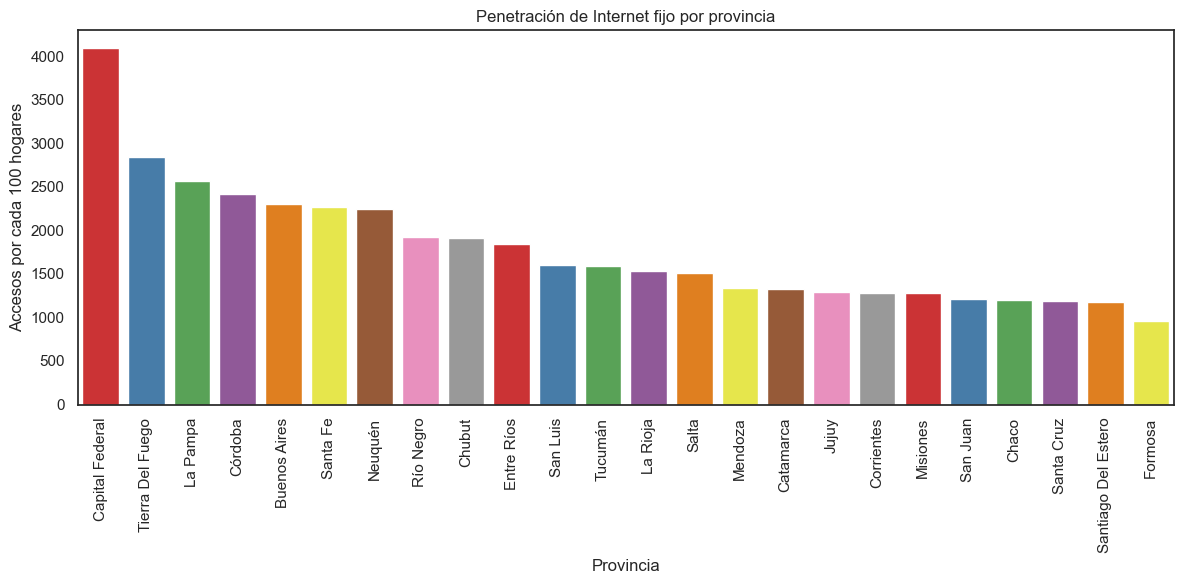

In [156]:
plt.figure(figsize=(12, 6))
sns.barplot(y="Accesos por cada 100 hogares", x="Provincia", data=Prov_hogar, palette="Set1")

#Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

plt.xlabel("Provincia")
plt.ylabel("Accesos por cada 100 hogares")
plt.title("Penetración de Internet fijo por provincia")

#Muestro el gráfico
plt.tight_layout()
plt.show()


En este gráfico, es evidente que, a pesar de una inversión limitada en Tierra del Fuego, esta provincia se sitúa en la segunda posición en términos de acceso a Internet por cada 100 hogares. Estos datos subrayan cómo una gestión efectiva de los recursos puede llevar a resultados notablemente positivos en el ámbito de la conectividad.


# Ingresos trimestrales por la prestación del servicio de Internet fijo
Ingresos trimestrales de los operadores por el servicio de Internet fijo

In [159]:
df13.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [160]:
df13.drop_duplicates(inplace=True)

In [161]:
outliers_col(df13)

Año | 0 | int64
Trimestre | 0 | int64
Ingresos (miles de pesos) | 0 | float64


In [162]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
 3   Periodo                    36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [163]:
ingresos_Año = df13.groupby("Año")["Ingresos (miles de pesos)"].sum().reset_index()

In [165]:
ingresos_Año.head()

,Año,Ingresos (miles de pesos)
0,2014,1.368395e+07
1,2015,2.010881e+07
2,2016,2.686751e+07
3,2017,3.967197e+07
4,2018,5.953959e+07


<function matplotlib.pyplot.show(close=None, block=None)>

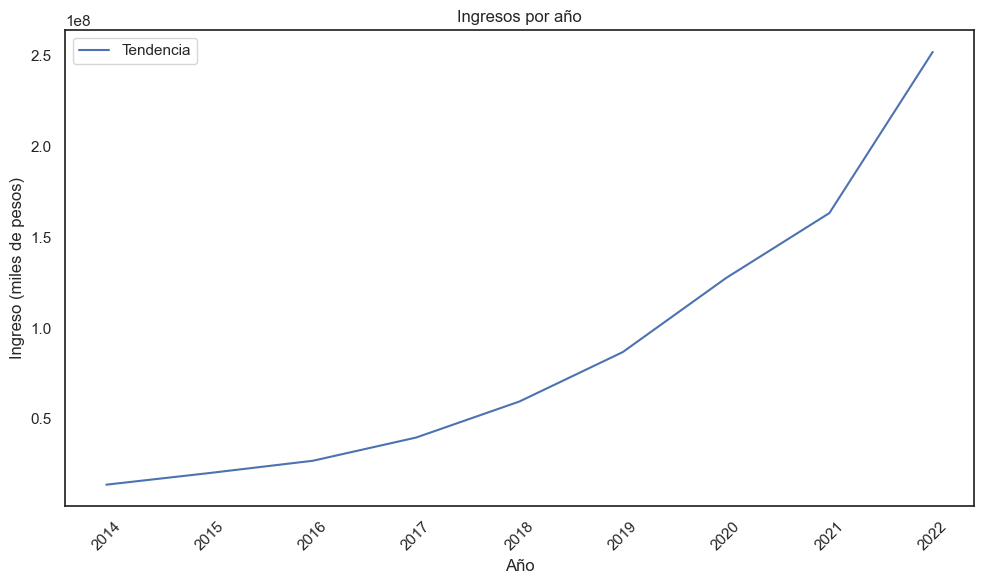

In [166]:
sns.set(style="white")


plt.figure(figsize=(10, 6))
sns.lineplot(data= ingresos_Año, x="Año", y="Ingresos (miles de pesos)", label="Tendencia")


plt.title("Ingresos por año")
plt.xlabel("Año")
plt.ylabel("Ingreso (miles de pesos)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show


Observamos que nuestros ingresos por la prestación de servicios se mantienen de manera estable y positiva a lo largo del tiempo, sin mostrar tendencias significativas de cambio. Esta consistencia en los ingresos refleja la confiabilidad y la demanda constante de nuestros servicios, lo que puede ser un indicativo de una base de clientes sólida y una gestión efectiva de la calidad de los servicios ofrecidos.

# Accesos a Internet fijo por velocidad bajada y por tecnología (Localidad)

### *"Hemos identificado conjuntos de datos que contienen información sobre el tipo de tecnología de conexión y la velocidad de banda ancha. Sin embargo, hemos observado que esta información se organiza en función de las localidades, lo cual no es relevante para nuestro análisis. Nuestro enfoque se centra en un análisis a nivel nacional y provincial, por lo que hemos decidido no considerar estos datos a nivel de localidades en nuestra investigación."*

In [169]:
df14.head(1)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0


In [172]:
outliers_col(df14)

Otros | 0 | float64
0,256 Mbps | 0 | float64
0,375 Mbps | 0 | float64
0,5 Mbps | 0 | float64
0,512 Mbps | 0 | float64
0,625 Mbps | 0 | float64
0,75 Mbps | 0 | float64
1 Mbps | 0 | float64
1,25 Mbps | 0 | float64
1,5 Mbps | 0 | float64
2 Mbps | 0 | float64
2,2 Mbps | 0 | float64
2,5 Mbps | 0 | float64
3 Mbps | 0 | float64
3,3 Mbps | 0 | float64
3,5 Mbps | 0 | float64
4 Mbps | 0 | float64
4,5 Mbps | 0 | float64
5 Mbps | 0 | float64
6 Mbps | 0 | float64
6,4 Mbps | 0 | float64
7 Mbps | 0 | float64
7,5 Mbps | 0 | float64
8 Mbps | 0 | float64
9 Mbps | 0 | float64
10 Mbps | 0 | float64
10,2 Mbps | 0 | float64
11 Mbps | 0 | float64
12 Mbps | 0 | float64
12,3 Mbps | 0 | float64
13 Mbps | 0 | float64
14 Mbps | 0 | float64
15 Mbps | 0 | float64
16 Mbps | 0 | float64
17 Mbps | 0 | float64
18 Mbps | 0 | float64
20 Mbps | 0 | float64
20,5 Mbps | 0 | float64
21 Mbps | 0 | float64
22 Mbps | 0 | float64
23 Mbps | 0 | float64
24 Mbps | 0 | float64
25 Mbps | 0 | float64
25,1 Mbps | 0 | float64
25,5 Mbps 

In [171]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Columns: 134 entries, Provincia to Total general
dtypes: float64(130), object(4)
memory usage: 3.2+ MB


In [170]:
df15.head(1)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977


In [173]:
outliers_col(df15)

ADSL | 16 | int64
CABLEMODEM | 10 | int64
DIAL UP | 17 | int64
FIBRA OPTICA | 24 | int64
OTROS | 15 | int64
SATELITAL | 4 | int64
WIMAX | 10 | int64
WIRELESS | 29 | int64
Total general | 11 | int64


In [174]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3137 non-null   object
 1   Partido        3137 non-null   object
 2   Localidad      3137 non-null   object
 3   Link Indec     3137 non-null   object
 4   ADSL           3137 non-null   int64 
 5   CABLEMODEM     3137 non-null   int64 
 6   DIAL UP        3137 non-null   int64 
 7   FIBRA OPTICA   3137 non-null   int64 
 8   OTROS          3137 non-null   int64 
 9   SATELITAL      3137 non-null   int64 
 10  WIMAX          3137 non-null   int64 
 11  WIRELESS       3137 non-null   int64 
 12  Total general  3137 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 318.7+ KB
